In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
file = pd.read_csv('CMAB_preprocessing_results.csv')
file.tail()

,key,tokenizer,technique,mcc,m_f1,w_f1,acc
27211,502,MWETokenizer,LR,-0.005060,0.391253,0.419161,0.540447
27212,502,MWETokenizer,KNN,0.012525,0.477203,0.470212,0.488104
27213,502,MWETokenizer,BNB,0.017636,0.425775,0.449765,0.542643
27214,502,MWETokenizer,CNN,0.000000,0.353296,0.386014,0.546303
27215,502,MWETokenizer,BiLSTM,0.000000,0.353296,0.386014,0.546303


In [5]:
print('Best MCC score ', max(file['mcc']))
print('Best M-F1 score ', max(file['m_f1']))
print('Best W-F1 score ', max(file['w_f1']))
print('Best ACC score ', max(file['acc']))

Best MCC score  0.5409604588915239
Best M-F1 score  0.7696819786497732
Best W-F1 score  0.7725915453591969
Best ACC score  0.7731166264001758


### Maximum

In [18]:
print('Best MCC score ', max(file['mcc']))
print('Best M-F1 score ', max(file['m_f1']))
print('Best W-F1 score ', max(file['w_f1']))
print('Best ACC score ', max(file['acc']))

Best MCC score  0.5409604588915239
Best M-F1 score  0.7696819786497732
Best W-F1 score  0.7725915453591969
Best ACC score  0.7731166264001758


In [19]:
file[file['mcc']==max(file['mcc'])]

,key,tokenizer,technique,mcc,m_f1,w_f1,acc
6030,119,TreebankWordTokenizer,CNN,0.54096,0.769027,0.771294,0.770498


In [7]:
file[file['m_f1']==max(file['m_f1'])]

,key,tokenizer,technique,mcc,m_f1,w_f1,acc
14031,262,ToktokTokenizer,BiLSTM,0.539915,0.769682,0.772592,0.773117


In [8]:
file[file['w_f1']==max(file['w_f1'])]

,key,tokenizer,technique,mcc,m_f1,w_f1,acc
14031,262,ToktokTokenizer,BiLSTM,0.539915,0.769682,0.772592,0.773117


In [9]:
file[file['acc']==max(file['acc'])]

,key,tokenizer,technique,mcc,m_f1,w_f1,acc
14031,262,ToktokTokenizer,BiLSTM,0.539915,0.769682,0.772592,0.773117


In [10]:
file_exp=pd.read_csv('../../experiment_data.csv')
file_exp[file_exp['key']==262]

,key,hashtag,userhandles,hyperlinks,emoji,emoticons,word_slangs,expanding_contraction,elongated_chararcters,replace_elongated_words,alphanumeric_slangs,remove_punctuations,capitalized_words,recurrent_word,Split_MixCase,Split_MixScript,misspled_words,stopwords_removal
262,262,0,1,0,1,1,1,1,1,1,1,1,1,0,1,1,0,1


In [11]:
file_exp[file_exp['key']==119]

,key,hashtag,userhandles,hyperlinks,emoji,emoticons,word_slangs,expanding_contraction,elongated_chararcters,replace_elongated_words,alphanumeric_slangs,remove_punctuations,capitalized_words,recurrent_word,Split_MixCase,Split_MixScript,misspled_words,stopwords_removal
119,119,0,0,0,1,1,1,1,0,0,1,0,1,1,1,1,0,1


## Heatmap

### MCC

In [197]:
mcc_key=file.iloc[file[file['mcc']==max(file['mcc'])].index[0]]['key']
mcc_hmap={}
start = file[file['key']==mcc_key].index[0]
for tknzr in file[file['key']==mcc_key]['tokenizer'].unique():
    mcc_demo=[]
    for i in range(start,start+8): #8
        mcc_demo.append(file.iloc[i]['mcc'])
    start=i+1
    mcc_hmap[tknzr]=mcc_demo    


In [198]:
row=['LSTM','GB','SGDC','LR','KNN','BNB','CNN','BiLSTM']
mcc_hmap_df=pd.DataFrame(mcc_hmap,index=row)

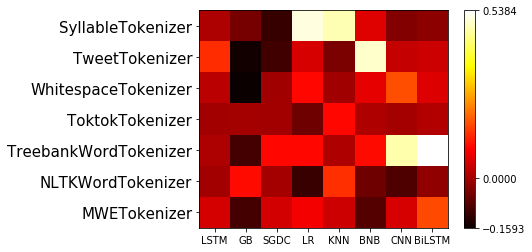

In [199]:
#plt.figure(figsize=(10,10))
plt.yticks(range(len(mcc_hmap_df.columns)),\
		mcc_hmap_df.columns,fontsize=15)
plt.xticks(range(len(row)),
		row,fontsize=10)
plt.imshow(mcc_hmap_df.transpose(),cmap='hot',interpolation='nearest')
cbar = plt.colorbar(ticks=[min(file[file['key']==mcc_key]['mcc']), 0.0, max(file[file['key']==mcc_key]['mcc'])])
plt.savefig('CMAB_heatmap_mcc.png',transparent=False,format='png',bbox_inches="tight",pad_inches=0)
#cbar.ax.set_yticklabels(['Low', 'Medium', 'High'])

### M-F1

In [200]:
mf1_key=file.iloc[file[file['m_f1']==max(file['m_f1'])].index[0]]['key']
mf1_hmap={}
start = file[file['key']==mf1_key].index[0]
for tknzr in file[file['key']==mf1_key]['tokenizer'].unique():
    mf1_demo=[]
    for i in range(start,start+8):
        mf1_demo.append(file.iloc[i]['m_f1'])
    start=i+1
    mf1_hmap[tknzr]=mf1_demo    
row=['LSTM','GB','SGDC','LR','KNN','BNB','CNN','BiLSTM']
mf1_hmap_df=pd.DataFrame(mf1_hmap,index=row)

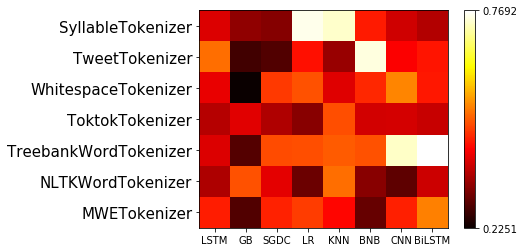

In [201]:
#plt.figure(figsize=(10,10))
plt.yticks(range(len(mf1_hmap_df.columns)),\
		mf1_hmap_df.columns,fontsize=15)
plt.xticks(range(len(row)),
		row,fontsize=10)
plt.imshow(mf1_hmap_df.transpose(),cmap='hot',interpolation='nearest')
cbar = plt.colorbar(ticks=[min(file[file['key']==mf1_key]['m_f1']), 0.0, max(file[file['key']==mf1_key]['m_f1'])])
plt.savefig('CMAB_heatmap_mf1.png',transparent=False,format='png',bbox_inches="tight",pad_inches=0)
#cbar.ax.set_yticklabels(['Low', 'Medium', 'High'])

### W-F1

In [202]:
wf1_key=file.iloc[file[file['w_f1']==max(file['w_f1'])].index[0]]['key']
wf1_hmap={}
start = file[file['key']==wf1_key].index[0]
for tknzr in file[file['key']==wf1_key]['tokenizer'].unique():
    wf1_demo=[]
    for i in range(start,start+8):
        wf1_demo.append(file.iloc[i]['w_f1'])
    start=i+1
    wf1_hmap[tknzr]=wf1_demo    
row=['LSTM','GB','SGDC','LR','KNN','BNB','CNN','BiLSTM']
wf1_hmap_df=pd.DataFrame(wf1_hmap,index=row)

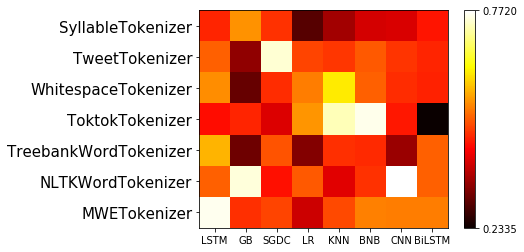

In [203]:
#plt.figure(figsize=(10,10))
plt.yticks(range(len(wf1_hmap_df.columns)),\
		wf1_hmap_df.columns,fontsize=15)
plt.xticks(range(len(row)),
		row,fontsize=10)
plt.imshow(wf1_hmap_df.transpose(),cmap='hot',interpolation='nearest')
cbar = plt.colorbar(ticks=[min(file[file['key']==wf1_key]['w_f1']), 0.0, max(file[file['key']==wf1_key]['w_f1'])])
plt.savefig('CMAB_heatmap_wf1.png',transparent=False,format='png',bbox_inches="tight",pad_inches=0)
#cbar.ax.set_yticklabels(['Low', 'Medium', 'High'])

### Acc

In [204]:
acc_key=file.iloc[file[file['acc']==max(file['acc'])].index[0]]['key']
acc_hmap={}
start = file[file['key']==acc_key].index[0]
for tknzr in file[file['key']==acc_key]['tokenizer'].unique():
    acc_demo=[]
    for i in range(start,start+8):
        acc_demo.append(file.iloc[i]['acc'])
    start=i+1
    acc_hmap[tknzr]=acc_demo    
row=['LSTM','GB','SGDC','LR','KNN','BNB','CNN','BiLSTM']
acc_hmap_df=pd.DataFrame(acc_hmap,index=row)

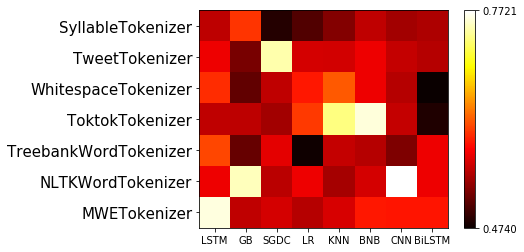

In [205]:
#plt.figure(figsize=(10,10))
plt.yticks(range(len(acc_hmap_df.columns)),\
		acc_hmap_df.columns,fontsize=15)
plt.xticks(range(len(row)),
		row,fontsize=10)
plt.imshow(acc_hmap_df.transpose(),cmap='hot',interpolation='nearest')
cbar = plt.colorbar(ticks=[min(file[file['key']==acc_key]['acc']), 0.0, max(file[file['key']==acc_key]['acc'])])
plt.savefig('CMAB_heatmap_acc.png',transparent=False,format='png',bbox_inches="tight",pad_inches=0)
#cbar.ax.set_yticklabels(['Low', 'Medium', 'High'])

## Standard Deviation

In [12]:
mcc_sd={}
mf1_sd={}
wf1_sd={}
acc_sd={}
#file2=file
for tchnq in file['technique'].unique():
    for tknzr in file['tokenizer'].unique():
        mcc_sd[tchnq+'_'+tknzr]=[mcc_val for mcc_val in file[(file['technique']==tchnq) & (file['tokenizer']==tknzr)]['mcc']]
        mf1_sd[tchnq+'_'+tknzr]=[mf1_val for mf1_val in file[(file['technique']==tchnq) & (file['tokenizer']==tknzr)]['m_f1']]
        wf1_sd[tchnq+'_'+tknzr]=[wf1_val for wf1_val in file[(file['technique']==tchnq) & (file['tokenizer']==tknzr)]['w_f1']]
        acc_sd[tchnq+'_'+tknzr]=[acc_val for acc_val in file[(file['technique']==tchnq) & (file['tokenizer']==tknzr)]['acc']]
#tkth_cmhs_df = pd.DataFrame(std_cmhs)

In [13]:
sd_cmsd_df={}
for i in range(0,file['key'].nunique()):
    sd_cmsd_df[i]=[int(i*1)*1,
                    pd.DataFrame(mcc_sd).transpose()[i].std(),
                    pd.DataFrame(mf1_sd).transpose()[i].std(),
                   pd.DataFrame(wf1_sd).transpose()[i].std(),
                   pd.DataFrame(acc_sd).transpose()[i].std()]
sd_cmsd_d=pd.DataFrame(sd_cmsd_df, index=['key','MCC_SD','MF1_SD','WF1_SD','ACC_SD']).transpose()
sd_cmsd_d.tail()

,key,MCC_SD,MF1_SD,WF1_SD,ACC_SD
481,481.0,0.009554,0.059752,0.045490,0.026045
482,482.0,0.012161,0.051191,0.035957,0.030859
483,483.0,0.013774,0.053394,0.037368,0.032073
484,484.0,0.013002,0.054612,0.039327,0.029433
485,485.0,0.009941,0.053777,0.039256,0.028434


In [14]:
print('maximum mcc deviation is',max(sd_cmsd_d['MCC_SD']),'for key ',sd_cmsd_d[sd_cmsd_d['MCC_SD']==max(sd_cmsd_d['MCC_SD'])]['key'])
print('maximum m_f1 deviation is',max(sd_cmsd_d['MF1_SD']),'for key ',sd_cmsd_d[sd_cmsd_d['MF1_SD']==max(sd_cmsd_d['MF1_SD'])]['key'])
print('maximum w_f1 deviation is',max(sd_cmsd_d['WF1_SD']),'for key ',sd_cmsd_d[sd_cmsd_d['WF1_SD']==max(sd_cmsd_d['WF1_SD'])]['key'])
print('maximum acc deviation is',max(sd_cmsd_d['ACC_SD']),'for key ',sd_cmsd_d[sd_cmsd_d['ACC_SD']==max(sd_cmsd_d['ACC_SD'])]['key'])

maximum mcc deviation is 0.22896188879455467 for key  97    97.0
Name: key, dtype: float64
maximum m_f1 deviation is 0.14098389346243576 for key  23    23.0
Name: key, dtype: float64
maximum w_f1 deviation is 0.13516958033210738 for key  9    9.0
Name: key, dtype: float64
maximum acc deviation is 0.11296827058284543 for key  97    97.0
Name: key, dtype: float64


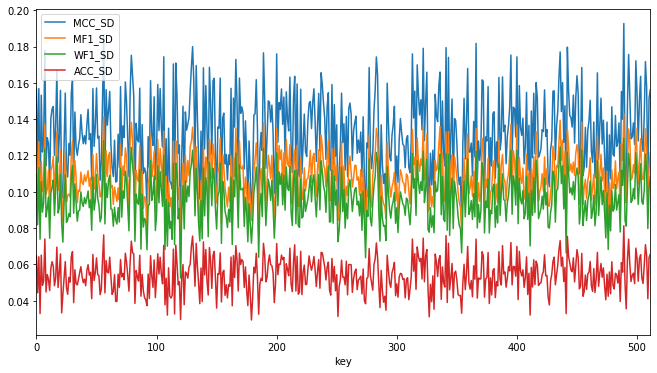

In [301]:
#sd_cmsd_d.plot(x='key',y=['MCC_SD','MF1_SD','WF1_SD','ACC_SD'],figsize=(11,6))
sd_cmsd_d_fig = sd_cmsd_d.plot(x='key',y=['MCC_SD','MF1_SD','WF1_SD','ACC_SD'],figsize=(11,6)).get_figure()
sd_cmsd_d_fig.savefig('CMAB_sd.png',transparent=False,format='png',bbox_inches="tight",pad_inches=0)

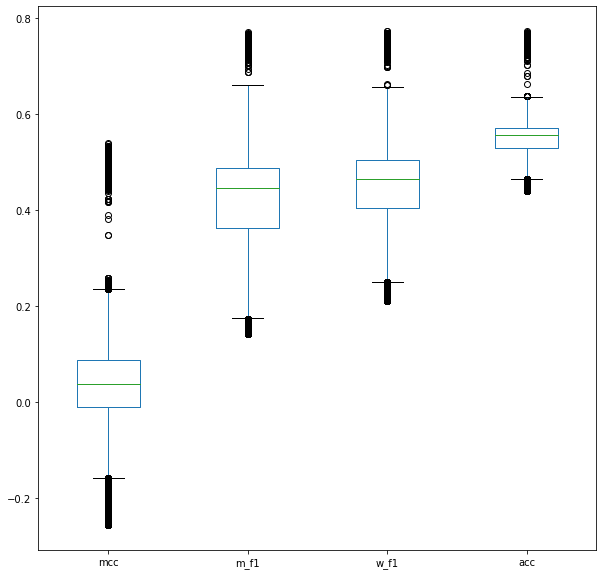

In [209]:
box_df=file.drop('key',axis=1)
box_df.boxplot(figsize=(10,10),grid=False)

## Performance Difference

In [15]:
#keeping the tokenizer and technique
perf_diff={}
for tchnq in file['technique'].unique():
    for tknzr in file['tokenizer'].unique():
        scr=[]
        for score in ['mcc','m_f1','w_f1','acc']:
            mx=max(file[(file['technique']==tchnq) & (file['tokenizer']==tknzr)][score])
            mn=min(file[(file['technique']==tchnq) & (file['tokenizer']==tknzr)][score])
            scr.append(mx)
            scr.append(mn)
            scr.append(mx-mn)
        perf_diff[tchnq+'_'+tknzr]=scr

In [16]:
perf_diff_df=pd.DataFrame(perf_diff,index=['mcc_mx','mcc_mn','mcc_diff','mf1_mx','mf1_mn','mf1_diff',
                              'wf1_mx','wf1_mn','wf1_diff','acc_mx','acc_mn','acc_diff']).transpose()

In [17]:
## Average difference of scores for combination of techniques and tokenizers
print('Average difference of MCC', sum(perf_diff_df['mcc_diff'])/len(perf_diff_df))
print('Average difference of MF1', sum(perf_diff_df['mf1_diff'])/len(perf_diff_df))
print('Average difference of WF1', sum(perf_diff_df['wf1_diff'])/len(perf_diff_df))
print('Average difference of ACC', sum(perf_diff_df['acc_diff'])/len(perf_diff_df))

Average difference of MCC 0.3008161177589609
Average difference of MF1 0.2525211251297514
Average difference of WF1 0.2387537431328123
Average difference of ACC 0.13205839196179078


In [16]:
(0.12497736766981858+0.19772465437788028+0.1175941530264957)/3

0.1467653916913982

In [9]:
perf_diff_df=pd.DataFrame(perf_diff,index=['mcc_mx','mcc_mn','mcc_diff','mf1_mx','mf1_mn','mf1_diff',
                              'wf1_mx','wf1_mn','wf1_diff','acc_mx','acc_mn','acc_diff']).transpose()

In [10]:
perf_diff_df[perf_diff_df['mcc_diff']==max(perf_diff_df['mcc_diff'])]

,mcc_mx,mcc_mn,mcc_diff,mf1_mx,mf1_mn,mf1_diff,wf1_mx,wf1_mn,wf1_diff,acc_mx,acc_mn,acc_diff
CNN_WhitespaceTokenizer,0.531746,-0.029018,0.560764,0.76567,0.353755,0.411915,0.769094,0.387292,0.381803,0.768668,0.547401,0.221266


In [11]:
perf_diff_df[perf_diff_df['mf1_diff']==max(perf_diff_df['mf1_diff'])]

,mcc_mx,mcc_mn,mcc_diff,mf1_mx,mf1_mn,mf1_diff,wf1_mx,wf1_mn,wf1_diff,acc_mx,acc_mn,acc_diff
BiLSTM_TweetTokenizer,0.537533,-0.010902,0.548435,0.768478,0.352223,0.416255,0.771115,0.383036,0.388079,0.770681,0.543741,0.22694


In [12]:
perf_diff_df[perf_diff_df['wf1_diff']==max(perf_diff_df['wf1_diff'])]

,mcc_mx,mcc_mn,mcc_diff,mf1_mx,mf1_mn,mf1_diff,wf1_mx,wf1_mn,wf1_diff,acc_mx,acc_mn,acc_diff
CNN_MWETokenizer,0.532334,-0.024932,0.557265,0.766166,0.351608,0.414558,0.769987,0.381338,0.388649,0.769949,0.542277,0.227672


In [13]:
perf_diff_df[perf_diff_df['acc_diff']==max(perf_diff_df['acc_diff'])]

,mcc_mx,mcc_mn,mcc_diff,mf1_mx,mf1_mn,mf1_diff,wf1_mx,wf1_mn,wf1_diff,acc_mx,acc_mn,acc_diff
CNN_MWETokenizer,0.532334,-0.024932,0.557265,0.766166,0.351608,0.414558,0.769987,0.381338,0.388649,0.769949,0.542277,0.227672


## Circular Barplot

In [118]:
import numpy as np

In [275]:
def get_label_rotation(angle, offset):
    # Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle + offset)
    if angle <= np.pi:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
    return rotation, alignment

In [276]:
def add_labels(angles, values, labels, offset, ax):
    
    # This is the space between the end of the bar and the label
    padding = 3
    
    # Iterate over angles, values, and labels, to add all of them.
    for angle, value, label, in zip(angles, values, labels):
        angle = angle
        
        # Obtain text rotation and alignment
        rotation, alignment = get_label_rotation(angle, offset)

        # And finally add the text
        ax.text(
            x=angle, 
            y=value + padding, 
            s=label, 
            ha=alignment, 
            va="center", 
            rotation=rotation, 
            rotation_mode="anchor"
        )
    return ax

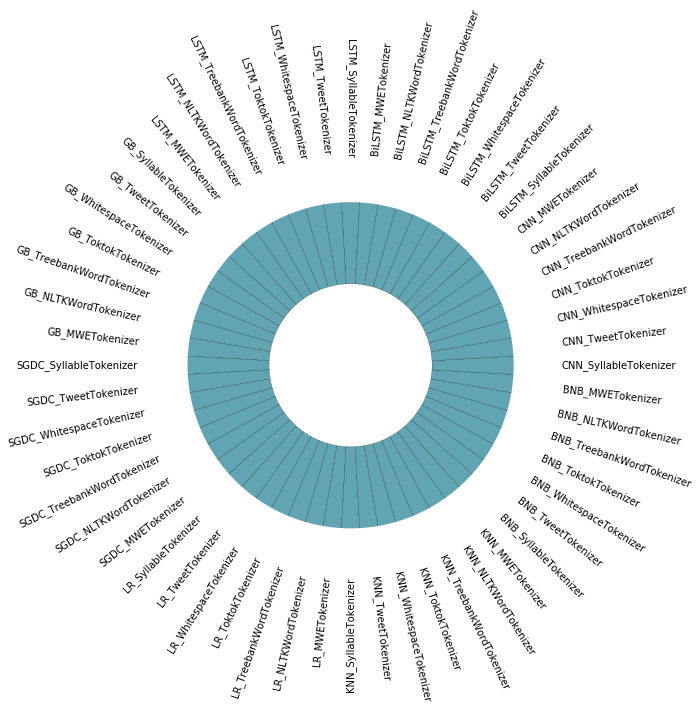

In [277]:
ANGLES = np.linspace(0, 2 * np.pi, len(perf_diff_df), endpoint=False)
VALUES = perf_diff_df["mcc_diff"].values
LABELS = perf_diff_df.index
# Determine the width of each bar. 
# The circumference is '2 * pi', so we divide that total width over the number of bars.
WIDTH = 2 * np.pi / len(VALUES)

# Determines where to place the first bar. 
# By default, matplotlib starts at 0 (the first bar is horizontal)
# but here we say we want to start at pi/2 (90 deg)
OFFSET = np.pi / 2

# Initialize Figure and Axis
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={"projection": "polar"})

# Specify offset
ax.set_theta_offset(OFFSET)

# Set limits for radial (y) axis. The negative lower bound creates the whole in the middle.
ax.set_ylim(-50, 50)

# Remove all spines
ax.set_frame_on(False)

# Remove grid and tick marks
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

# Add bars
ax.bar(
    ANGLES, VALUES*100, width=WIDTH, linewidth=0.2,
    color="#61a4b2", edgecolor="black"
)

# Add labels
add_labels(ANGLES, VALUES*100, LABELS, OFFSET, ax)

In [278]:
C=['#588b8b','#588b8b','#588b8b','#588b8b','#588b8b','#588b8b','#588b8b',
   '#f2e8cf','#f2e8cf','#f2e8cf','#f2e8cf','#f2e8cf','#f2e8cf','#f2e8cf',
   '#ffd5c2','#ffd5c2','#ffd5c2','#ffd5c2','#ffd5c2','#ffd5c2','#ffd5c2',
  '#f28f3b','#f28f3b','#f28f3b','#f28f3b','#f28f3b','#f28f3b','#f28f3b',
   '#c8553d','#c8553d','#c8553d','#c8553d','#c8553d','#c8553d','#c8553d',
   '#2d3047','#2d3047','#2d3047','#2d3047','#2d3047','#2d3047','#2d3047',
   '#93b7be','#93b7be','#93b7be','#93b7be','#93b7be','#93b7be','#93b7be',
   '#00ffff','#00ffff','#00ffff','#00ffff','#00ffff','#00ffff','#00ffff'
  ]

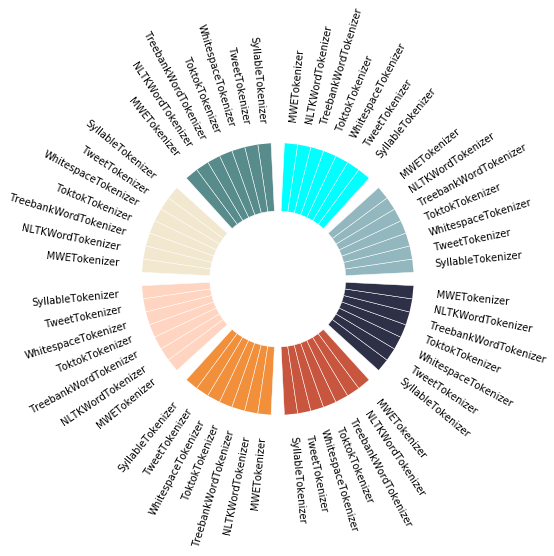

In [311]:
VALUES = perf_diff_df["mcc_diff"].values
LABELS = [lbl.split('_')[1] for lbl in perf_diff_df.index]#perf_diff_df.index
#LABELS = LABELS
GROUP = file['technique'].unique()

PAD = 1
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))

ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

#GROUPS_SIZE = [len(i[1]) for i in df.groupby("group")]
GROUPS_SIZE = [7 for i in range(0,8)]


offset = 0
IDXS = []
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

fig, ax = plt.subplots(figsize=(5, 5), subplot_kw={"projection": "polar"})

ax.set_theta_offset(OFFSET)
ax.set_ylim(-60, 60)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

GROUPS_SIZE = [7 for i in range(0,8)]#[len(i[1]) for i in df.groupby("group")]
#COLORS = [C[i] for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

# Add bars to represent ...
ax.bar(
    ANGLES[IDXS], VALUES*100, width=WIDTH, color=C, 
    edgecolor="white", linewidth=0.5
)

add_labels(ANGLES[IDXS], VALUES*100, LABELS, OFFSET, ax)

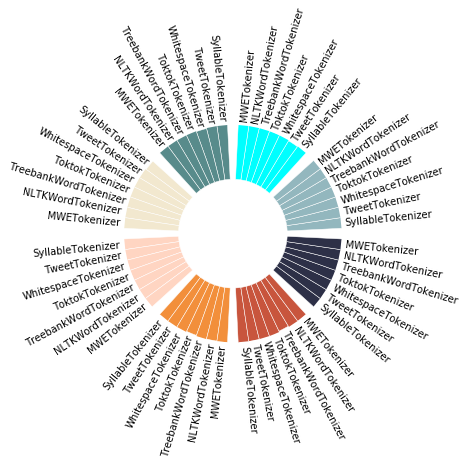

In [308]:
VALUES = perf_diff_df["mf1_diff"].values
LABELS = [lbl.split('_')[1] for lbl in perf_diff_df.index]#perf_diff_df.index
#LABELS = LABELS
GROUP = file['technique'].unique()

PAD = 1
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))

ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

#GROUPS_SIZE = [len(i[1]) for i in df.groupby("group")]
GROUPS_SIZE = [7 for i in range(0,8)]


offset = 0
IDXS = []
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

fig, ax = plt.subplots(figsize=(4, 4), subplot_kw={"projection": "polar"})

ax.set_theta_offset(OFFSET)
ax.set_ylim(-60, 60)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

#GROUPS_SIZE = [6 for i in range(0,8)]#[len(i[1]) for i in df.groupby("group")]
#COLORS = [C[i] for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

# Add bars to represent ...
ax.bar(
    ANGLES[IDXS], VALUES*100, width=WIDTH, color=C, 
    edgecolor="white", linewidth=0.5
)

add_labels(ANGLES[IDXS], VALUES*100, LABELS, OFFSET, ax)

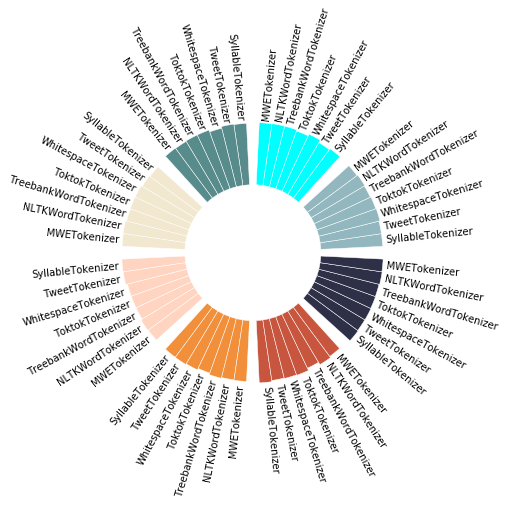

In [309]:
VALUES = perf_diff_df["wf1_diff"].values
LABELS = [lbl.split('_')[1] for lbl in perf_diff_df.index]#perf_diff_df.index
#LABELS = LABELS
GROUP = file['technique'].unique()

PAD = 1
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))

ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

#GROUPS_SIZE = [len(i[1]) for i in df.groupby("group")]
GROUPS_SIZE = [7 for i in range(0,8)]


offset = 0
IDXS = []
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

fig, ax = plt.subplots(figsize=(5, 5), subplot_kw={"projection": "polar"})

ax.set_theta_offset(OFFSET)
ax.set_ylim(-60, 60)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

GROUPS_SIZE = [7 for i in range(0,8)]#[len(i[1]) for i in df.groupby("group")]
#COLORS = [C[i] for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

# Add bars to represent ...
ax.bar(
    ANGLES[IDXS], VALUES*100, width=WIDTH, color=C, 
    edgecolor="white", linewidth=0.5
)

add_labels(ANGLES[IDXS], VALUES*100, LABELS, OFFSET, ax)

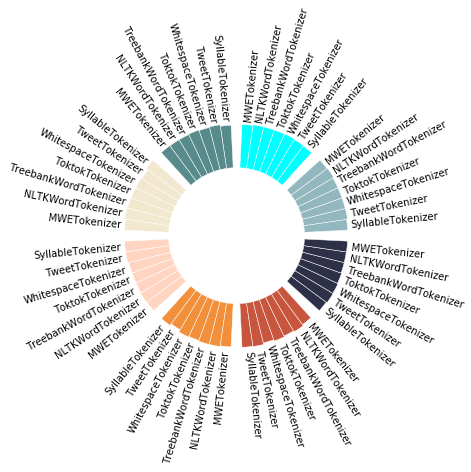

In [310]:
VALUES = perf_diff_df["acc_diff"].values
LABELS = [lbl.split('_')[1] for lbl in perf_diff_df.index]#perf_diff_df.index
#LABELS = LABELS
GROUP = file['technique'].unique()

PAD = 1
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))

ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

#GROUPS_SIZE = [len(i[1]) for i in df.groupby("group")]
GROUPS_SIZE = [7 for i in range(0,8)]


offset = 0
IDXS = []
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

fig, ax = plt.subplots(figsize=(5, 5), subplot_kw={"projection": "polar"})

ax.set_theta_offset(OFFSET)
ax.set_ylim(-50, 50)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

GROUPS_SIZE = [7 for i in range(0,8)]#[len(i[1]) for i in df.groupby("group")]
#COLORS = [C[i] for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

# Add bars to represent ...
ax.bar(
    ANGLES[IDXS], VALUES*100, width=WIDTH, color=C, 
    edgecolor="white", linewidth=0.5
)

axx = add_labels(ANGLES[IDXS], VALUES*100, LABELS, OFFSET, ax)

## Average for key

In [312]:
avg_mcc=[]
avg_mf1=[]
avg_wf1=[]
avg_acc=[]
for i in range(0,file['key'].nunique()):
    avg_mcc.append(sum(file[file['key']==i]['mcc'])/len(file[file['key']==i]))
    avg_mf1.append(sum(file[file['key']==i]['m_f1'])/len(file[file['key']==i]))
    avg_wf1.append(sum(file[file['key']==i]['w_f1'])/len(file[file['key']==i]))
    avg_acc.append(sum(file[file['key']==i]['acc'])/len(file[file['key']==i]))


In [313]:
avg_df=pd.DataFrame()
avg_df['key']=file['key'].unique()
avg_df['avg_mcc']=avg_mcc
avg_df['avg_mf1']=avg_mf1
avg_df['avg_wf1']=avg_wf1
avg_df['avg_acc']=avg_acc
avg_df.tail()

,key,avg_mcc,avg_mf1,avg_wf1,avg_acc
507,507,0.049407,0.439901,0.465790,0.559309
508,508,0.063014,0.452615,0.476848,0.563520
509,509,0.040236,0.428278,0.454486,0.554442
510,510,0.086139,0.467338,0.490382,0.573317
511,511,0.035908,0.424867,0.450657,0.551907


### Average MCC

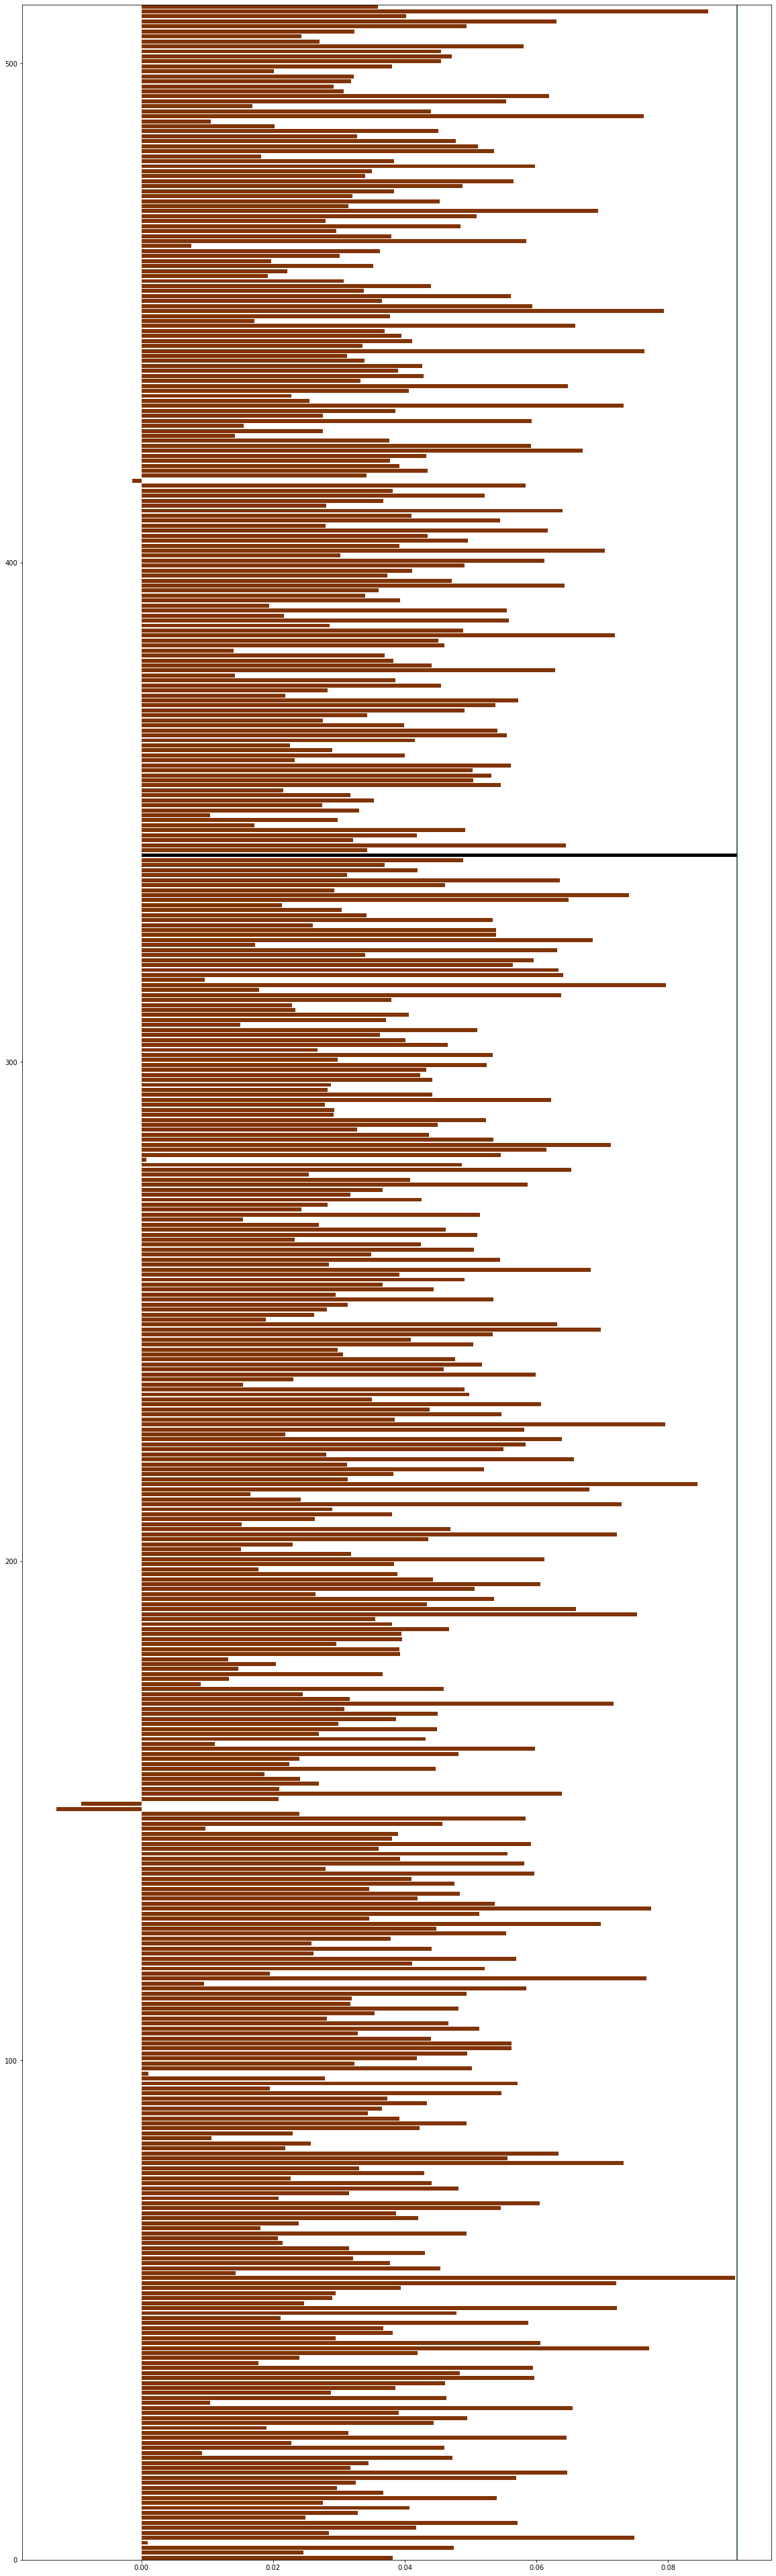

In [314]:
index_max = avg_df[avg_df['avg_mcc']==max(avg_df['avg_mcc'])].index[0]
plt.figure(figsize=(20,70))
#color
c=[]
for i in range(0,len(avg_df)):
    if i!=index_max:
        c.append('#813405')
    else:
        c.append('#000000')

plt.barh(avg_df['key'],avg_df['avg_mcc'],color = c,align='edge')
# setting x-label as pen sold
#plt.xlabel("Average MCC")

# setting y_label as price
#plt.ylabel("Keys")  
#plt.title("Average MCC performance of various combination of pre-processing steps")
plt.margins(y=0)
plt.axvline(x =max(avg_df['avg_mcc']), color = '#183a37',)
#plt.yticks(file['key'])
plt.savefig('CMAB_average_mcc.png',transparent=False,format='png',bbox_inches="tight",pad_inches=0)
plt.show()

### Average ACC

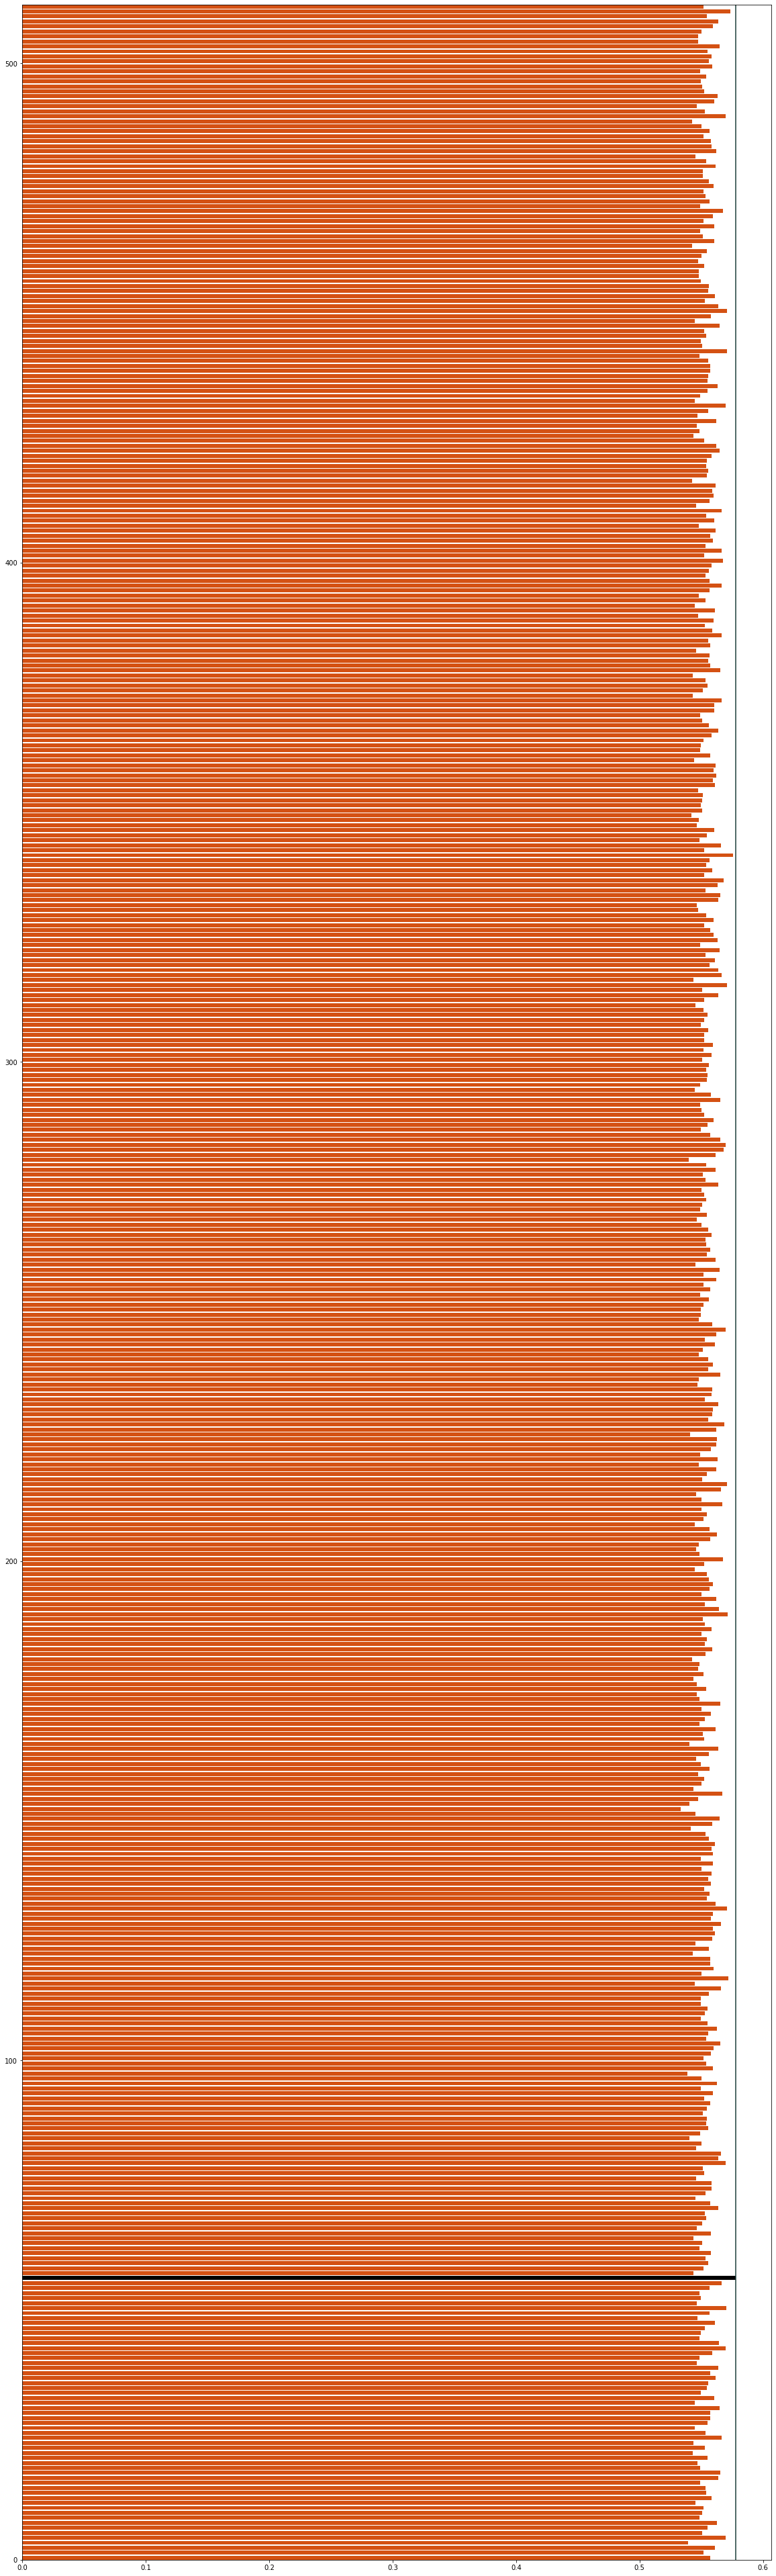

In [315]:
index_max = avg_df[avg_df['avg_acc']==max(avg_df['avg_acc'])].index[0]
plt.figure(figsize=(20,70))
#color
c=[]
for i in range(0,len(avg_df)):
    if i!=index_max:
        c.append('#d45113')
    else:
        c.append('#000000')

plt.barh(avg_df['key'],avg_df['avg_acc'],color = c,align='edge')
# setting x-label as pen sold
#plt.xlabel("Average Accuracy")

# setting y_label as price
#plt.ylabel("Keys")  
#plt.title("Average accuracy performance of various combination of pre-processing steps")
plt.margins(y=0)
plt.axvline(x =max(avg_df['avg_acc']), color = '#183a37',)
#plt.yticks(file['key'])
plt.savefig('CMAB_average_acc.png',transparent=False,format='png',bbox_inches="tight",pad_inches=0)
plt.show()

### Average MF1

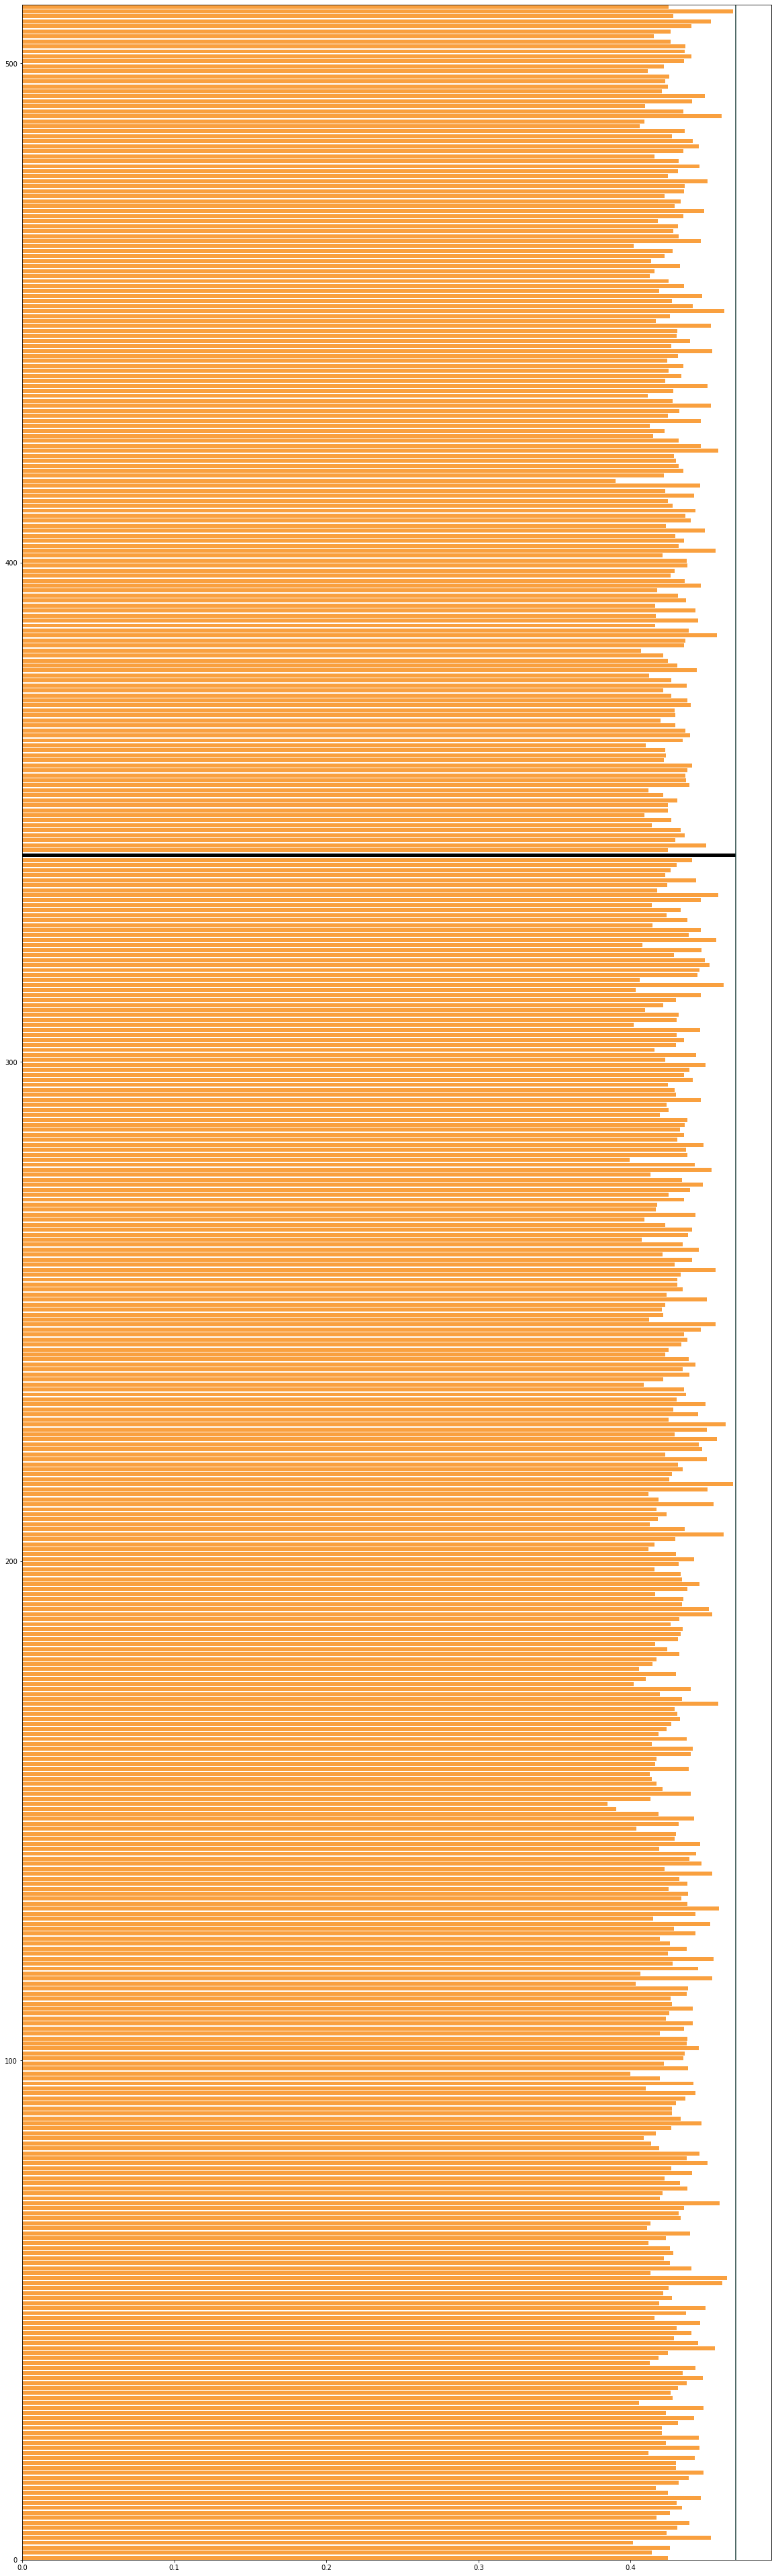

In [316]:
index_max = avg_df[avg_df['avg_mf1']==max(avg_df['avg_mf1'])].index[0]
plt.figure(figsize=(20,70))
#color
c=[]
for i in range(0,len(avg_df)):
    if i!=index_max:
        c.append('#f9a03f')
    else:
        c.append('#000000')

plt.barh(avg_df['key'],avg_df['avg_mf1'],color = c,align='edge')
# setting x-label as pen sold
#plt.xlabel("Average Macro-F1")

# setting y_label as price
#plt.ylabel("Keys")  
#plt.title("Average Macro-F1 performance of various combination of pre-processing steps")
plt.margins(y=0)
plt.axvline(x =max(avg_df['avg_mf1']), color = '#183a37',)
#plt.yticks(file['key'])
plt.savefig('CMAB_average_mf1.png',transparent=False,format='png',bbox_inches="tight", pad_inches=0)
plt.show()

In [317]:
### Average WF1

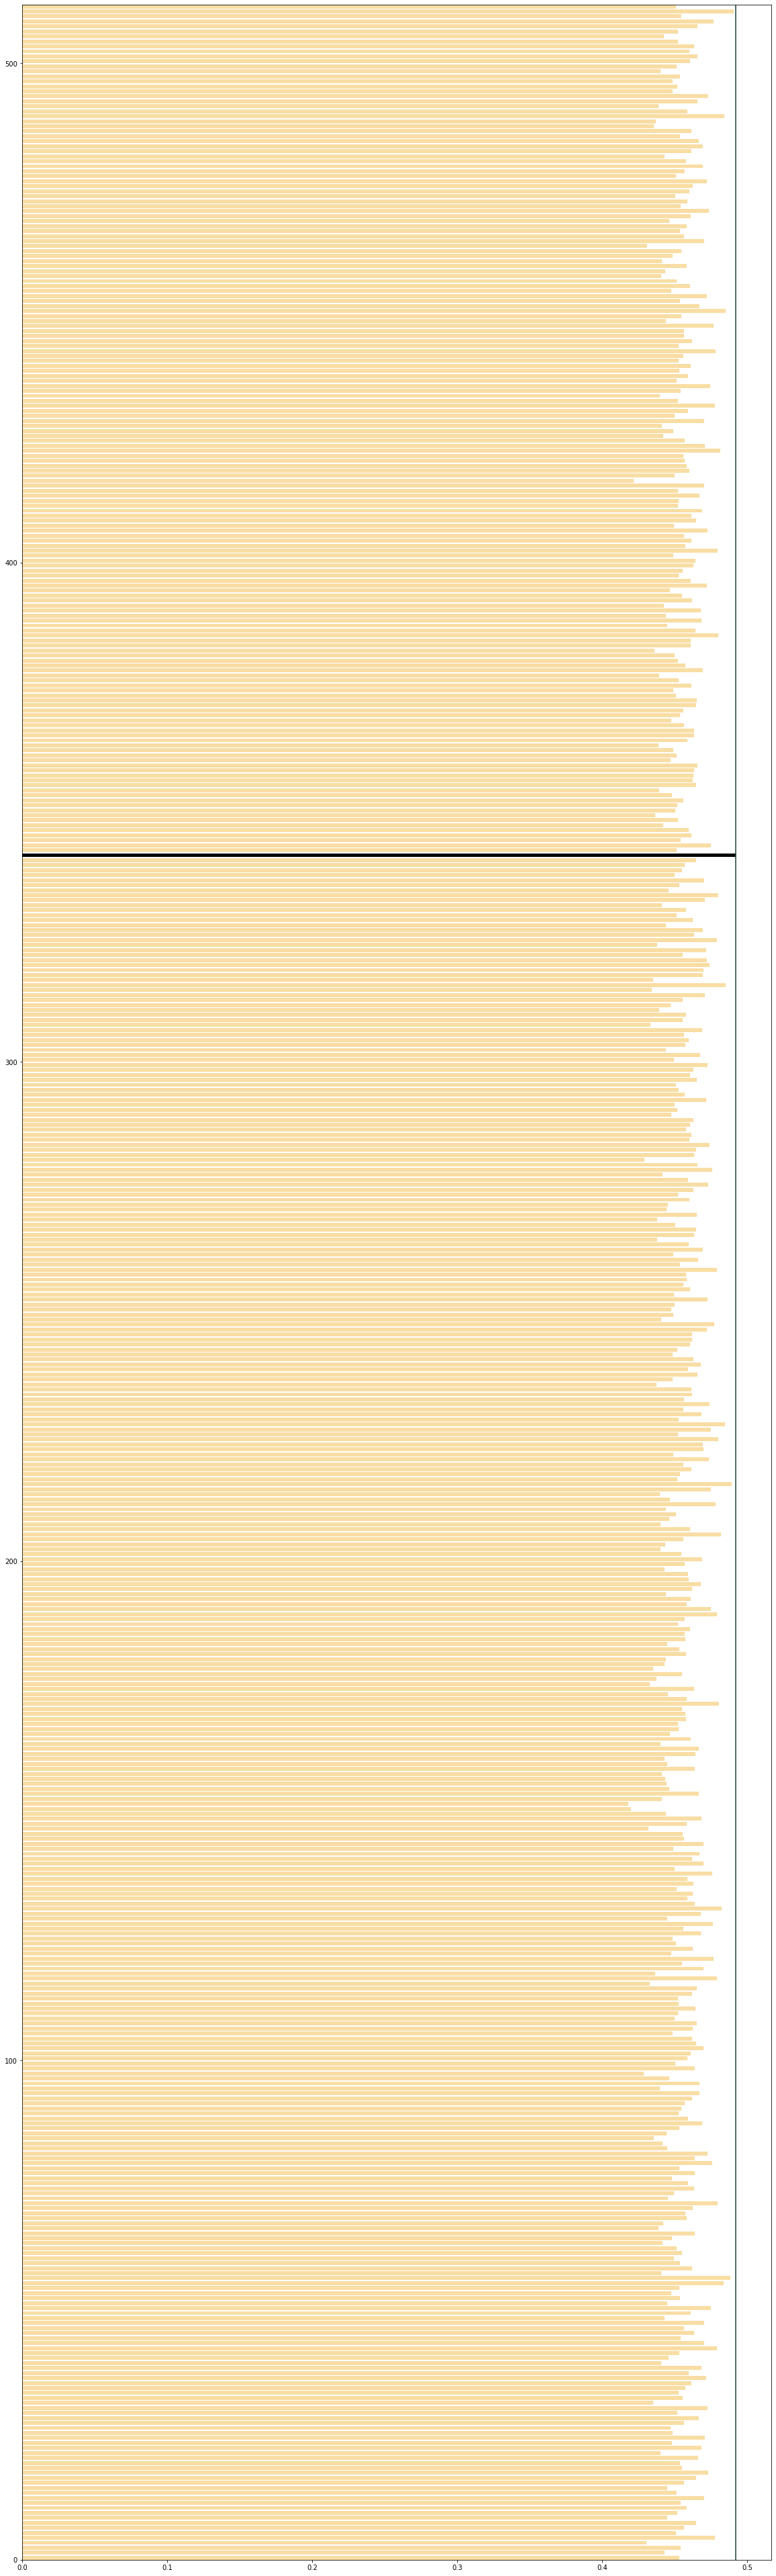

In [318]:
index_max = avg_df[avg_df['avg_wf1']==max(avg_df['avg_wf1'])].index[0]
plt.figure(figsize=(20,70))
#color
c=[]
for i in range(0,len(avg_df)):
    if i!=index_max:
        c.append('#f8dda4')
    else:
        c.append('#000000')

plt.barh(avg_df['key'],avg_df['avg_wf1'],color = c,align='edge')
# setting x-label as pen sold
#plt.xlabel("Average Weighted-F1")

# setting y_label as price
#plt.ylabel("Keys")  
#plt.title("Average Weighted-F1 performance of various combination of pre-processing steps")
plt.margins(y=0)
plt.axvline(x =max(avg_df['avg_wf1']), color = '#183a37',)
#plt.yticks(file['key'])
plt.savefig('CMAB_average_wf1.png',transparent=False,format='png',bbox_inches="tight",pad_inches=0)
plt.show()